In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/llm_comparison_dataset.csv")
df["Open-Source Label"] = df["Open-Source"].map({1: "Open-Source", 0: "Closed-Source"})
df["Value Score"] = df["Quality Rating"] / df["Price / Million Tokens"]

**Understanding the data**

In [ ]:
df.head()

,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating,Open-Source Label,Value Score
0,DeepSeek-4,Deepseek,128000,95,2.74,85,1143,1,18.81,760952565,13,0.50,2,2,3,Open-Source,0.106326
1,Llama-8,Meta AI,300000,284,3.21,71,1390,1,3.98,22891342,22,2.07,1,3,3,Open-Source,0.251256
2,Llama-5,Meta AI,300000,225,2.95,85,1406,0,1.02,827422145,21,0.95,2,3,2,Closed-Source,1.960784
3,DeepSeek-3,Deepseek,2000000,242,12.89,72,1264,1,27.63,694305632,86,3.51,1,3,3,Open-Source,0.036193
4,DeepSeek-8,Deepseek,1000000,71,3.80,77,1381,1,18.52,378552278,92,1.80,2,2,3,Open-Source,0.107991


In [ ]:
df.tail()

,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating,Open-Source Label,Value Score
195,Gemini-3,Google,2000000,62,7.04,64,1222,0,29.10,186555415,67,1.15,1,2,3,Closed-Source,0.034364
196,Gemini-9,Google,2000000,259,3.80,92,1467,1,2.86,113913164,80,2.58,3,3,3,Open-Source,1.048951
197,Nova-7,AWS,256000,130,18.19,79,939,1,20.19,571980809,7,4.22,2,2,3,Open-Source,0.099059
198,GPT-4,OpenAI,128000,268,11.75,78,939,1,13.34,482443470,52,3.69,2,3,3,Open-Source,0.149925
199,Llama-4,Meta AI,1000000,170,8.14,94,1188,0,26.05,865120794,14,2.76,3,2,3,Closed-Source,0.115163


In [ ]:
df.describe()

,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating,Value Score
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.371800e+05,163.240000,9.358750,77.945000,1192.960000,0.490000,14.475200,4.902643e+08,46.915000,2.519100,1.900000,2.275000,2.910000,0.379554
std,6.909439e+05,79.188106,5.489481,10.182356,174.649767,0.501154,8.890484,2.747544e+08,28.408679,1.458241,0.802008,0.625565,0.303911,1.001154
min,1.280000e+05,20.000000,0.600000,60.000000,902.000000,0.000000,0.200000,2.012584e+06,2.000000,0.150000,1.000000,1.000000,1.000000,0.033750
25%,2.000000e+05,93.750000,4.265000,69.000000,1043.250000,0.000000,6.090000,2.622976e+08,22.000000,1.150000,1.000000,2.000000,3.000000,0.076252
50%,2.560000e+05,165.500000,8.820000,80.000000,1200.500000,0.000000,14.660000,5.002494e+08,43.500000,2.525000,2.000000,2.000000,3.000000,0.134957
75%,1.000000e+06,236.000000,14.035000,87.000000,1343.750000,1.000000,21.515000,7.210857e+08,72.000000,3.807500,3.000000,3.000000,3.000000,0.305500
max,2.000000e+06,294.000000,19.800000,94.000000,1493.000000,1.000000,29.890000,9.844345e+08,99.000000,4.980000,3.000000,3.000000,3.000000,10.000000


In [ ]:
print(df.shape)

(200, 17)


In [ ]:
print(df.columns)

Index(['Model', 'Provider', 'Context Window', 'Speed (tokens/sec)',
       'Latency (sec)', 'Benchmark (MMLU)', 'Benchmark (Chatbot Arena)',
       'Open-Source', 'Price / Million Tokens', 'Training Dataset Size',
       'Compute Power', 'Energy Efficiency', 'Quality Rating', 'Speed Rating',
       'Price Rating', 'Open-Source Label', 'Value Score'],
      dtype='object')


In [ ]:
df.nunique()

,0
Model,70
Provider,8
Context Window,6
Speed (tokens/sec),143
Latency (sec),189
Benchmark (MMLU),35
Benchmark (Chatbot Arena),165
Open-Source,2
Price / Million Tokens,193
Training Dataset Size,200


In [ ]:
df['Speed (tokens/sec)'].unique()

array([ 95, 284, 225, 242,  71, 163,  88, 118,  44,  72, 170,  76,  58,
       128, 200,  61, 205, 141, 152, 182, 234, 240, 254, 165, 258,  28,
        93, 272, 249,  26, 193, 160, 187, 189, 213,  24,  48, 184, 155,
       164, 236, 151,  89, 271, 294, 201, 186, 110, 221,  38, 145, 192,
       261, 239,  77, 167,  20, 209, 210, 136, 153,  63, 179, 168,  99,
       232, 222, 248, 183, 246, 166,  39,  66, 252,  33, 162,  73, 278,
        31, 243, 291, 175,  27, 109, 197,  47,  60, 247, 211, 220, 231,
       259,  65,  54, 101, 275, 216,  29, 270, 138,  84, 196, 286,  82,
       117, 124,  25,  42, 102, 104,  97,  70, 224, 279,  53, 114,  91,
       173, 269, 181, 137, 287, 255, 241, 131, 274, 226,  85,  94, 122,
       245, 268, 185,  49, 266, 125, 100, 157, 203, 292, 281,  62, 130])

In [ ]:
df['Provider'].unique()

array(['Deepseek', 'Meta AI', 'AWS', 'Anthropic', 'Google', 'OpenAI',
       'Cohere', 'Mistral AI'], dtype=object)

In [ ]:
print(df.dtypes)

Model                         object
Provider                      object
Context Window                 int64
Speed (tokens/sec)             int64
Latency (sec)                float64
Benchmark (MMLU)               int64
Benchmark (Chatbot Arena)      int64
Open-Source                    int64
Price / Million Tokens       float64
Training Dataset Size          int64
Compute Power                  int64
Energy Efficiency            float64
Quality Rating                 int64
Speed Rating                   int64
Price Rating                   int64
Open-Source Label             object
Value Score                  float64
dtype: object


In [ ]:
print(df.head())

        Model  Provider  Context Window  Speed (tokens/sec)  Latency (sec)  \
0  DeepSeek-4  Deepseek          128000                  95           2.74   
1     Llama-8   Meta AI          300000                 284           3.21   
2     Llama-5   Meta AI          300000                 225           2.95   
3  DeepSeek-3  Deepseek         2000000                 242          12.89   
4  DeepSeek-8  Deepseek         1000000                  71           3.80   

   Benchmark (MMLU)  Benchmark (Chatbot Arena)  Open-Source  \
0                85                       1143            1   
1                71                       1390            1   
2                85                       1406            0   
3                72                       1264            1   
4                77                       1381            1   

   Price / Million Tokens  Training Dataset Size  Compute Power  \
0                   18.81              760952565             13   
1                 

**Checking if there are any missing values**

In [ ]:
print(df.isnull().sum())

Model                        0
Provider                     0
Context Window               0
Speed (tokens/sec)           0
Latency (sec)                0
Benchmark (MMLU)             0
Benchmark (Chatbot Arena)    0
Open-Source                  0
Price / Million Tokens       0
Training Dataset Size        0
Compute Power                0
Energy Efficiency            0
Quality Rating               0
Speed Rating                 0
Price Rating                 0
Open-Source Label            0
Value Score                  0
dtype: int64


**There are no any missing values**

**Data Visualization**

***Univariate***

**Count Plot**

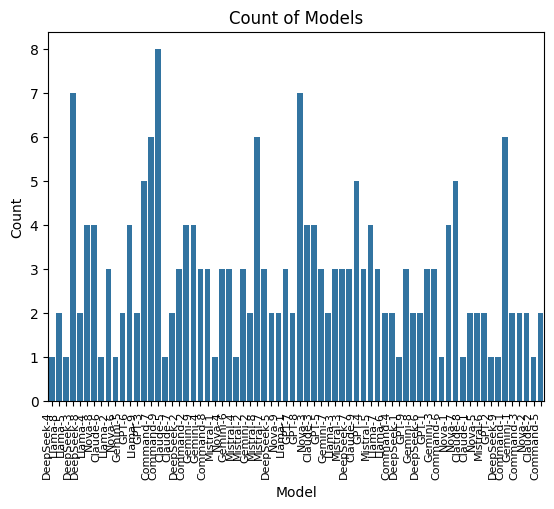

In [ ]:
sns.countplot(data=df, x='Model')
plt.title('Count of Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

**PieChart**

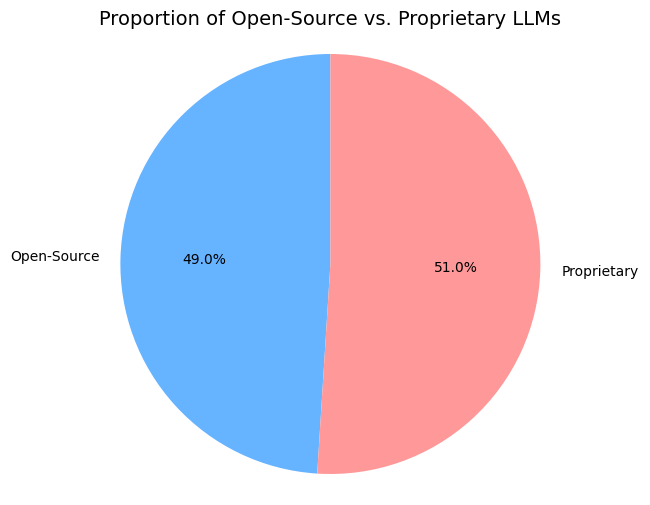

In [ ]:
import matplotlib.pyplot as plt

opensource_count = df['Open-Source'].value_counts()[1]
proprietary_count = df['Open-Source'].value_counts()[0]

labels = ['Open-Source', 'Proprietary']
sizes = [opensource_count, proprietary_count]
colors = ['#66b3ff', '#ff9999']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Open-Source vs. Proprietary LLMs', fontsize=14)
plt.axis('equal')
plt.show()

**Histogram**

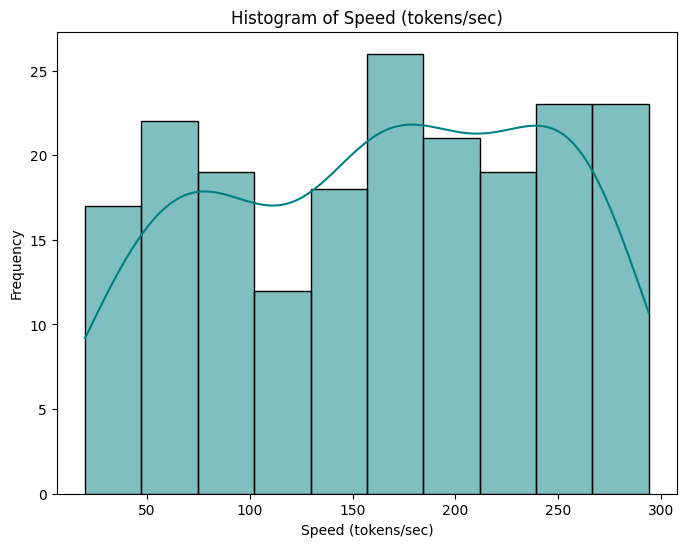

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Speed (tokens/sec)'], kde=True, bins=10, color='teal', edgecolor='black')
plt.title('Histogram of Speed (tokens/sec)')
plt.xlabel('Speed (tokens/sec)')
plt.ylabel('Frequency')
plt.show()

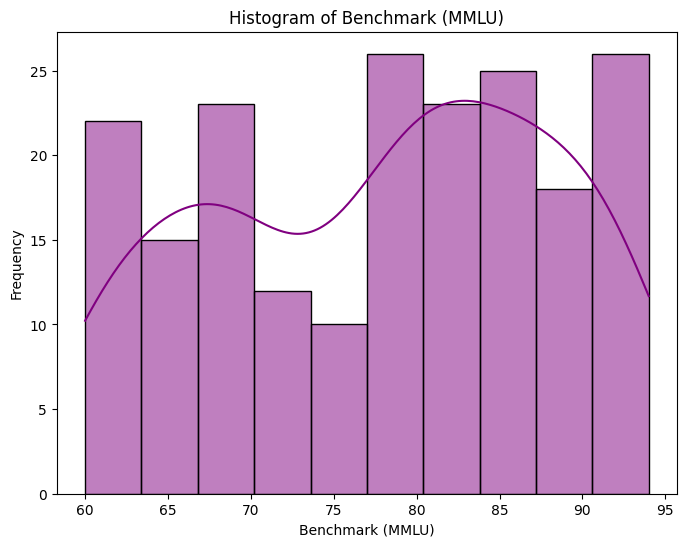

In [ ]:
# Plot histogram for Benchmark (MMLU)
plt.figure(figsize=(8, 6))
sns.histplot(df['Benchmark (MMLU)'], kde=True, bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Benchmark (MMLU)')
plt.xlabel('Benchmark (MMLU)')
plt.ylabel('Frequency')
plt.show()

***Bivariate***

**Scatter Plot**

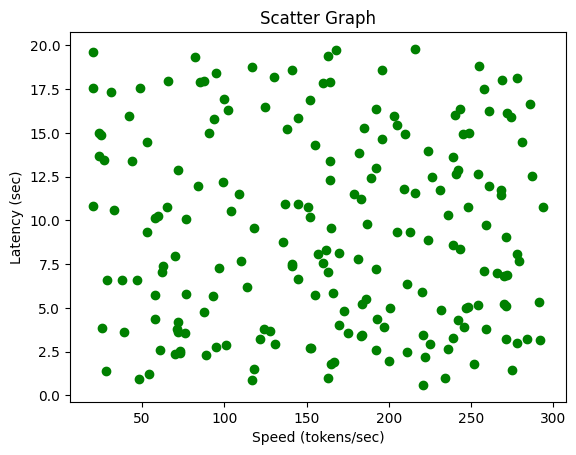

In [ ]:
x = df['Speed (tokens/sec)']
y = df['Latency (sec)']
plt.title("Scatter Graph")
plt.xlabel("Speed (tokens/sec)")
plt.ylabel("Latency (sec)")
plt.scatter(x,y,color='green')
plt.show()

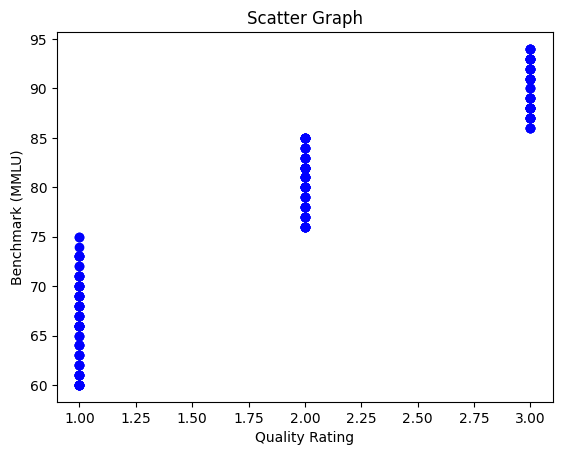

In [ ]:
x = df['Quality Rating']
y = df['Benchmark (MMLU)']
plt.title("Scatter Graph")
plt.xlabel("Quality Rating")
plt.ylabel("Benchmark (MMLU)")
plt.scatter(x,y,color='blue')
plt.show()

**Top Quality Models**

<ipython-input-22-2e3894db2cb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Quality Rating", y="Model", data=top_quality.head(10), palette="viridis")


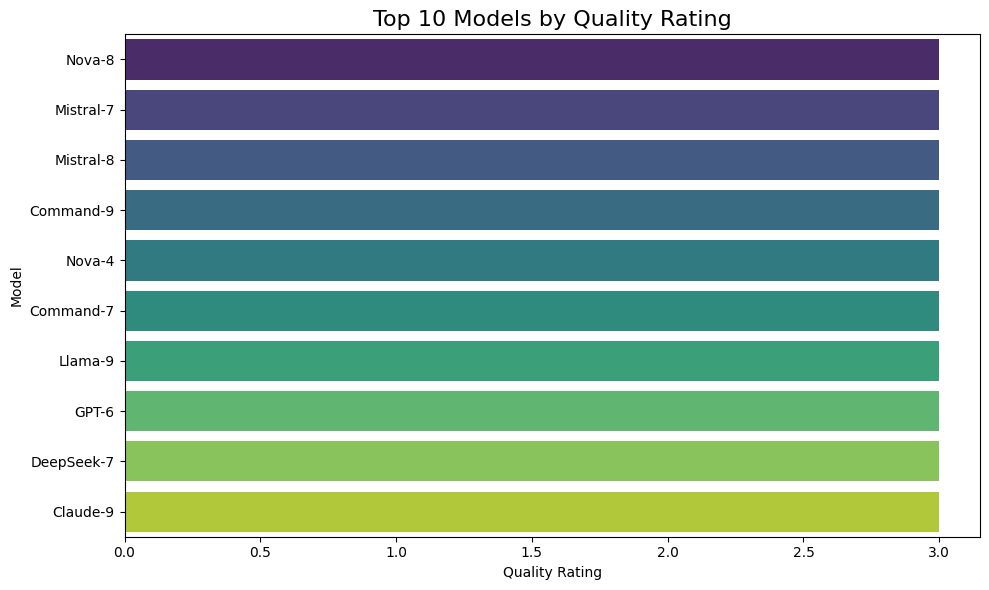

In [ ]:
top_quality = df.sort_values("Quality Rating", ascending=False)[["Model", "Quality Rating"]]

plt.figure(figsize=(10, 6))
sns.barplot(x="Quality Rating", y="Model", data=top_quality.head(10), palette="viridis")
plt.title("Top 10 Models by Quality Rating", fontsize=16)
plt.xlabel("Quality Rating")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

**Fastest Models**

<ipython-input-23-b3e45587458e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Speed (tokens/sec)", y="Model", data=fastest_models.head(10), palette="crest")


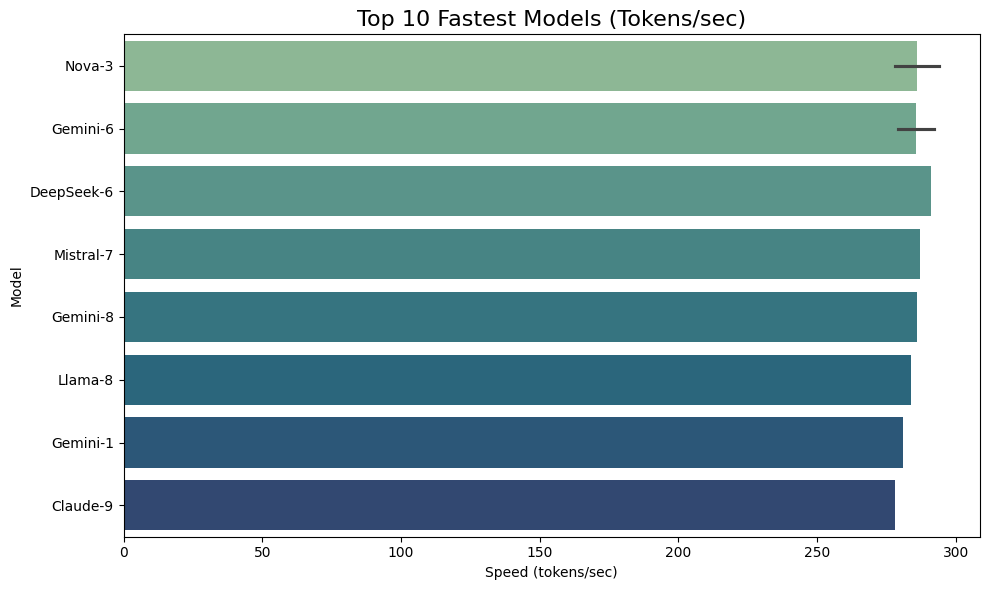

In [ ]:
fastest_models = df.sort_values("Speed (tokens/sec)", ascending=False)[["Model", "Speed (tokens/sec)"]]

plt.figure(figsize=(10, 6))
sns.barplot(x="Speed (tokens/sec)", y="Model", data=fastest_models.head(10), palette="crest")
plt.title("Top 10 Fastest Models (Tokens/sec)", fontsize=16)
plt.xlabel("Speed (tokens/sec)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

**Best Values**

<ipython-input-24-55e0564dfb71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value Score", y="Model", data=best_value.head(10), palette="mako")


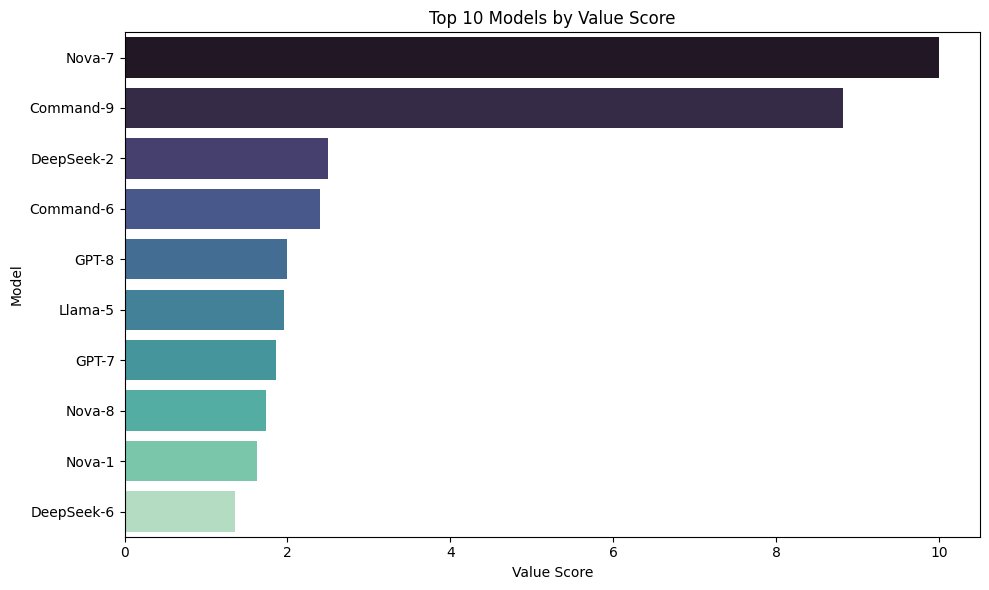

In [ ]:
best_value = df.sort_values("Value Score", ascending=False)[["Model", "Value Score"]]
plt.figure(figsize=(10, 6))
sns.barplot(x="Value Score", y="Model", data=best_value.head(10), palette="mako")
plt.title("Top 10 Models by Value Score")
plt.tight_layout()
plt.show()

**BarPlot**

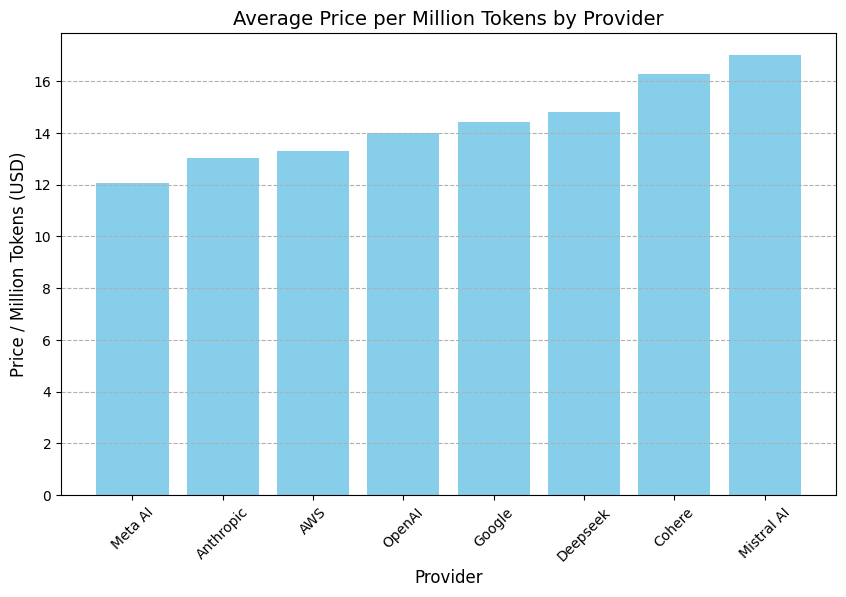

In [ ]:
df = pd.read_csv('llm_comparison_dataset.csv')
provider_prices = df.groupby('Provider')['Price / Million Tokens'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(provider_prices.index, provider_prices.values, color='skyblue')
plt.title('Average Price per Million Tokens by Provider', fontsize=14)
plt.xlabel('Provider', fontsize=12)
plt.ylabel('Price / Million Tokens (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Bar **plot**

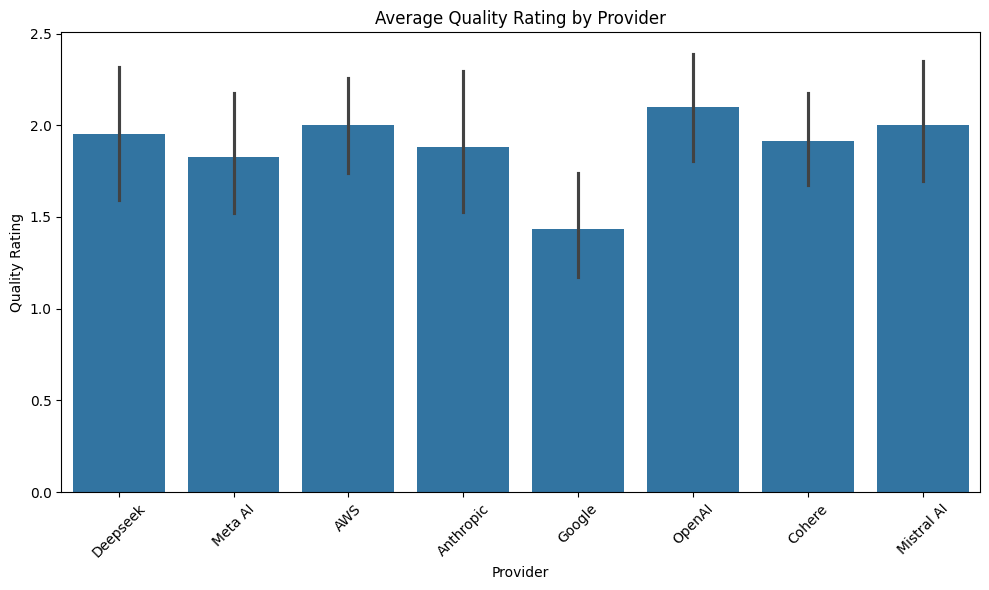

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Provider', y='Quality Rating')

plt.title('Average Quality Rating by Provider')
plt.xlabel('Provider')
plt.ylabel('Quality Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Multivariate***

**HeatMap**

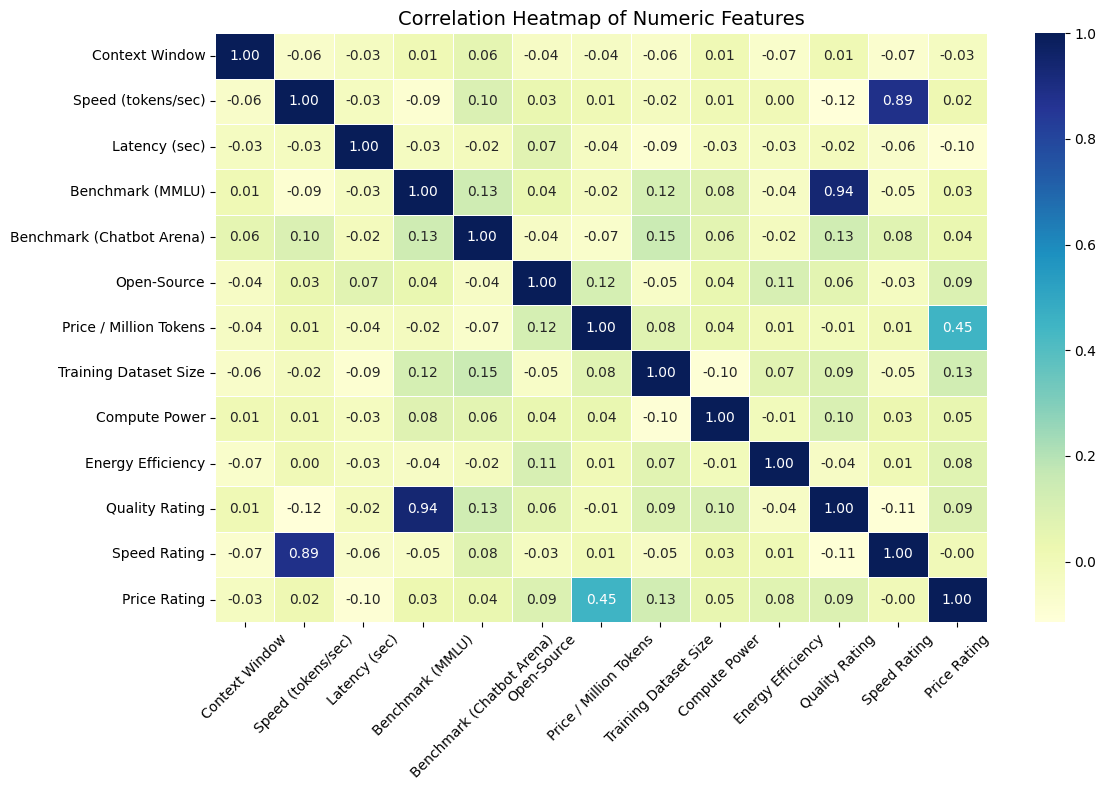

In [ ]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Multiclass Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:

target = 'Quality Rating'

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['Model', 'Provider']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=[target])
y = df[target]

In [ ]:

numeric_features = X.select_dtypes(include=np.number).columns
X_scaled = scaler.fit_transform(X[numeric_features])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:

y_pred = clf.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       0.92      0.85      0.88        13
           3       1.00      0.93      0.96        14

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



**Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:

target = 'Quality Rating'


In [ ]:
label_encoders = {}
for col in ['Model', 'Provider']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [ ]:

X = df.drop(columns=[target])
y = df[target]


In [ ]:
numeric_features = X.select_dtypes(include=np.number).columns
X_scaled = scaler.fit_transform(X[numeric_features])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)


In [ ]:

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 2.3587798381186075e-13
Mean Squared Error: 9.359777448031676e-26
R² Score: 1.0


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [ ]:

features = [
    "Context Window", "Speed (tokens/sec)", "Latency (sec)",
    "Benchmark (MMLU)", "Benchmark (Chatbot Arena)", "Open-Source",
    "Price / Million Tokens", "Training Dataset Size", "Compute Power",
    "Energy Efficiency", "Speed Rating", "Price Rating"
]


In [ ]:

target = "Quality Rating"

X = df[features]
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


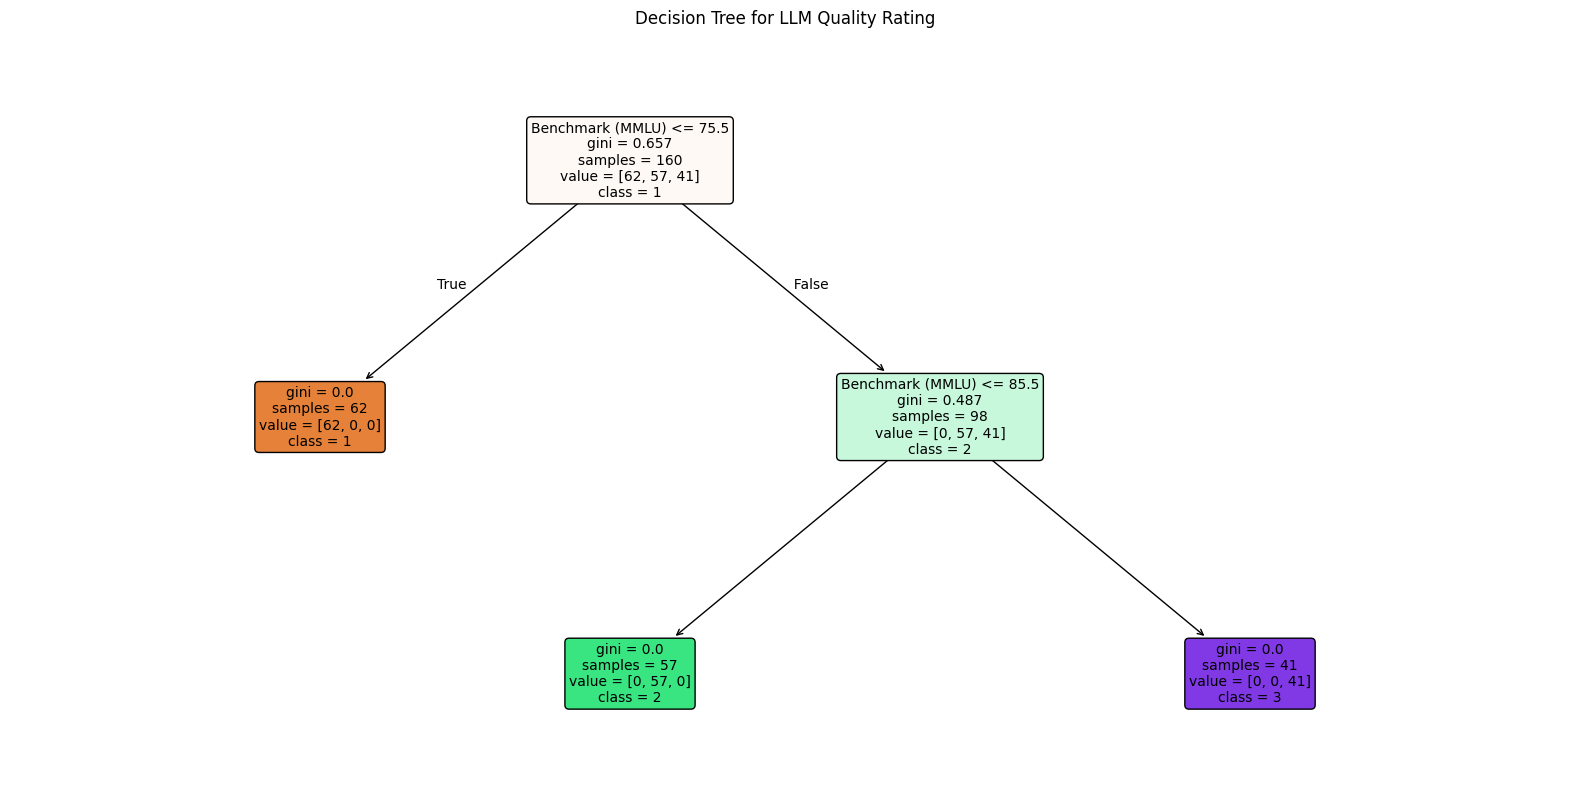

In [ ]:
plt.figure(figsize=(20, 10))

plot_tree(
    dt_clf,
    feature_names=features,
    class_names=["1", "2", "3"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree for LLM Quality Rating")
plt.show()

Logistic Regression

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:

X = df.drop(columns=['Quality Rating'])
y = df['Quality Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.375

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.62      0.47        13
           2       0.50      0.23      0.32        13
           3       0.31      0.29      0.30        14

    accuracy                           0.38        40
   macro avg       0.40      0.38      0.36        40
weighted avg       0.39      0.38      0.36        40



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


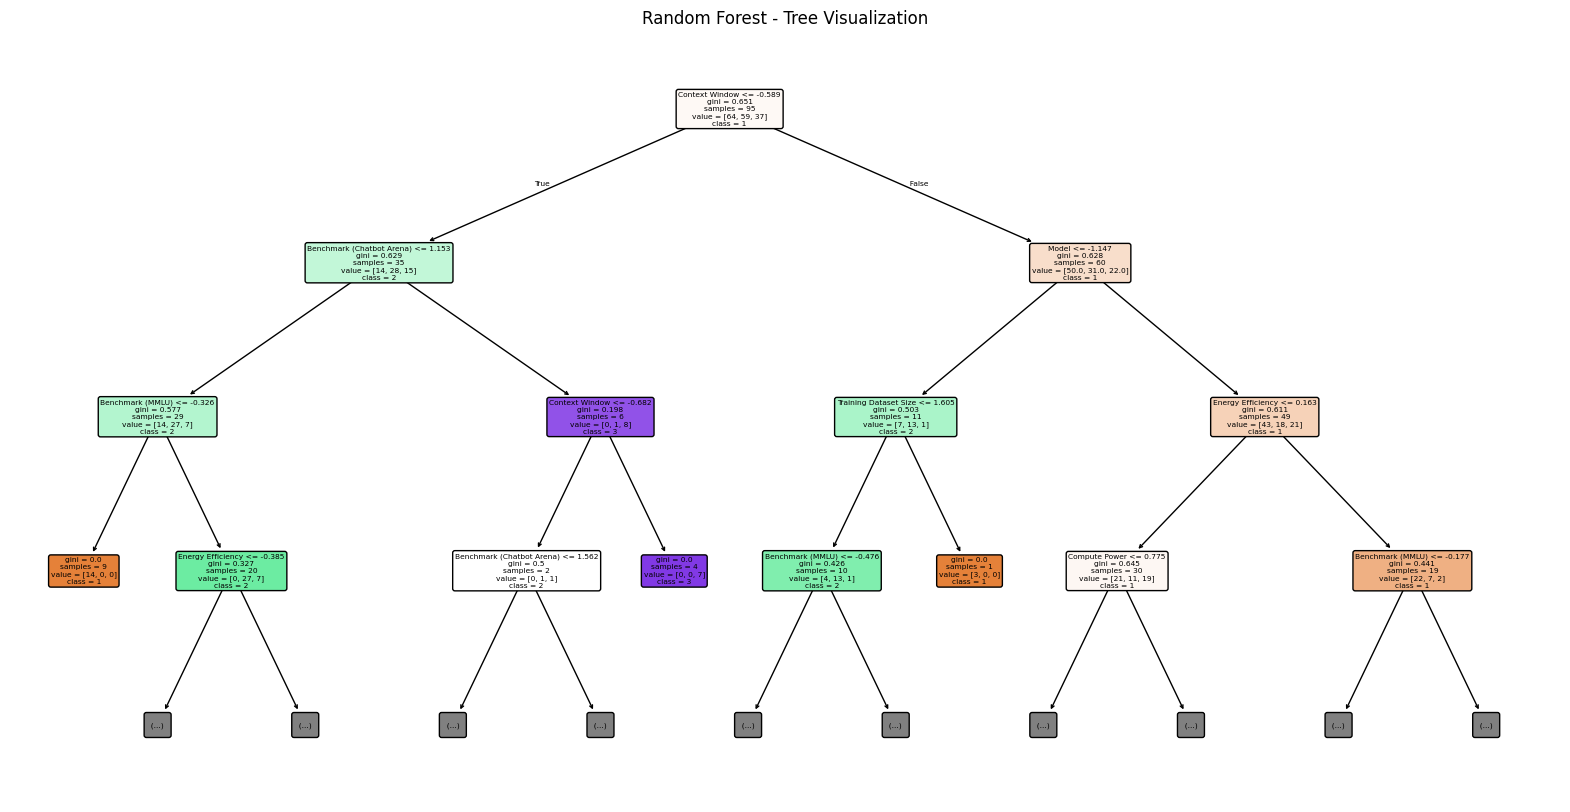

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          feature_names=X.columns,
          class_names=[str(cls) for cls in sorted(y.unique())],
          filled=True,
          rounded=True,
          max_depth=3)
plt.title("Random Forest - Tree Visualization")
plt.show()

**Support Vector Machine**

In [ ]:
target_column = 'Quality Rating'


In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       0.92      0.92      0.92        13
           3       1.00      0.93      0.96        14

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



**Support Vector Machine Regressor**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
model = SVR()

In [ ]:
model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.15686256477709398
R² Score: 0.7673956407383221


Voting Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report





In [ ]:

target_column = 'Quality Rating'

X = df.drop(columns=[target_column])
y = df[target_column]


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)


voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('svm', clf3)
], voting='hard')


voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))])

In [ ]:
y_pred = voting_clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.87      1.00      0.93        13
           3       1.00      0.86      0.92        14

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
model = GradientBoostingClassifier()

In [ ]:
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0
